# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/guyraviv2/Y-Data-Regression

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

X, y = load_boston(return_X_y=True)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
X.shape # (506, 13) - There are 506 samples with 13 features so N = 506 and p = 13


(506, 13)

In [5]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X):
    bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
    return np.hstack((bias,X))
  
  def fit(self, X, Y):
    #remeber pad with 1 before fitting
    self._fit(X,Y)
    
  
  def _fit(self, X, Y):
    # optional to use this
    x = self.pad(X)
    self.w = np.matmul(np.linalg.pinv(x),Y)
  
  def predict(self, X):
    #return wx
    return self._predict(X)
  
  def _predict(self, X):
    # optional to use this
    return (self.pad(X)@self.w)
    
  def score(self, X, Y):
    #return MSE
    if X.shape[1] == self.w.shape[0]:
      ans = (np.power(abs(X@self.w - Y),2)).mean()
    else:
      y_pred = self.pad(X)@self.w
      ans = (np.power(abs(y_pred - Y),2)).mean()
    return ans

In [11]:
model = Ols()
model.fit(X,y)
print('The MSE of the training is: '+str(model.score(X,y)))

The MSE of the training is: 21.894831181729206


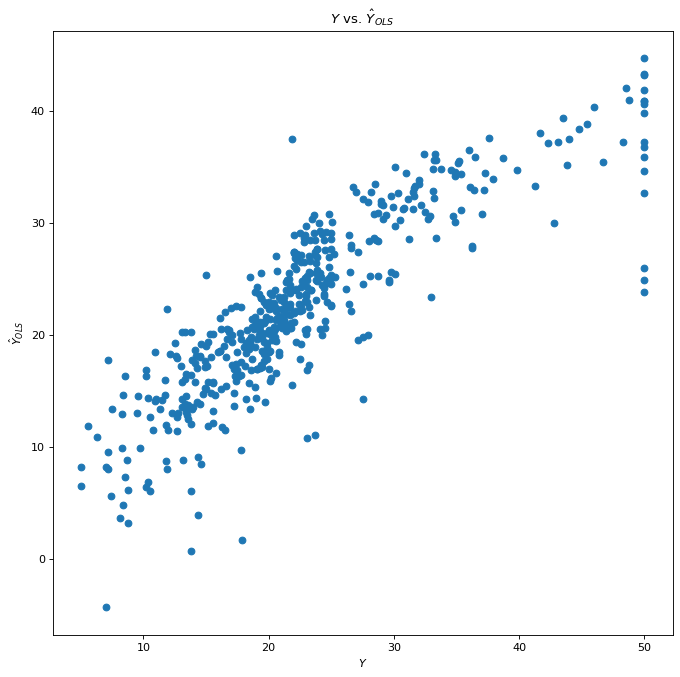

In [12]:
import matplotlib.pyplot as plt
y_pred = model.predict(X)
plt.figure(figsize=(10, 10), dpi=80)
plt.title('$Y$ vs. $\hat{Y}_{OLS}$')
plt.xlabel('$Y$')
plt.ylabel('$\hat{Y}_{OLS}$')
plt.scatter(y,y_pred) 

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

In [39]:
from sklearn.model_selection import train_test_split
mse_train_list,mse_test_list =  [],[]
for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=32)
  model = Ols()
  model.fit(X_train,y_train)
  mse_train_list.append(model.score(X_train,y_train))
  mse_test_list.append(model.score(X_test,y_test))
print('The MSE of the train is: '+str(np.array(mse_train_list).mean()))
print('The MSE of the test is: '+str(np.array(mse_test_list).mean()))

The MSE of the train is: 20.824536540904084
The MSE of the test is: 26.098986684548954


In [40]:
from scipy import stats
stats.ttest_rel(mse_train_list,mse_test_list, alternative='less')

Ttest_relResult(statistic=-2.5885334127633864e+16, pvalue=1.8028474236895996e-301)

As can be seen above, the $P-value < 5\% $ so we can say with confidance of $95\%$ that the $MSE$ of the train is lower than the $MSE$ of the test

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs
  
  

In [15]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    pass

  def fit(self, X):
    self.avg = X.mean(axis = 0)
    self.stnd = X.std(axis = 0)
  
  def predict(self, X):
    #apply normalization
    ans_x =X.copy()
    return (ans_x - self.avg)/self.stnd
    
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True,
               track_loss = True):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    self.track_loss = track_loss
    
  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting
    norm = self.normalizer
    norm.fit(X)
    x_norm = norm.predict(X)
    x_norm = self.pad(x_norm)
    #self.w = np.random.rand(x_norm.shape[1])
    self.w = np.ones(x_norm.shape[1])
    y = Y
    conv = 1
    counter = 0
    self.loss_track = []
    prev_loss = self._loss(x_norm,y)
    self.loss_track.append(prev_loss)
    while counter < self.num_iteration and conv >0.0001:
      self._step(x_norm, y)
      conv = prev_loss/self._loss(x_norm,y) - 1
      prev_loss = self._loss(x_norm,y)
      counter += 1
      if self.track_loss:
        self.loss_track.append(self._loss(x_norm,y))    

  def _predict(self, X):
    #remeber to normalize the data before starting
    self.normalizer.fit(self.pad(X))
    X = self.normalizer.predict(X)
    return X@self.w
    pass
      
  def _step(self, X, Y):
    # use w update for gradient descent
    grad = 2*np.matmul(X.T,(np.matmul(X,self.w) - Y))
    self.w = self.w - self.learning_rate/len(X)*grad

  def _loss(self, X, y):
    vec = np.matmul(X,self.w) - y
    return (np.matmul(vec.T,vec)).mean()
  
  def score(self, X, Y):
    #return MSE
    x = self.normalizer
    x = x.predict(X)
    y_pred = self.pad(x)@self.w
    ans = (np.power(abs(y_pred - Y),2)).mean()
    return ans

model2 = OlsGd()
model2.fit(X,y)
model2.score(X,y)

22.023589843403073

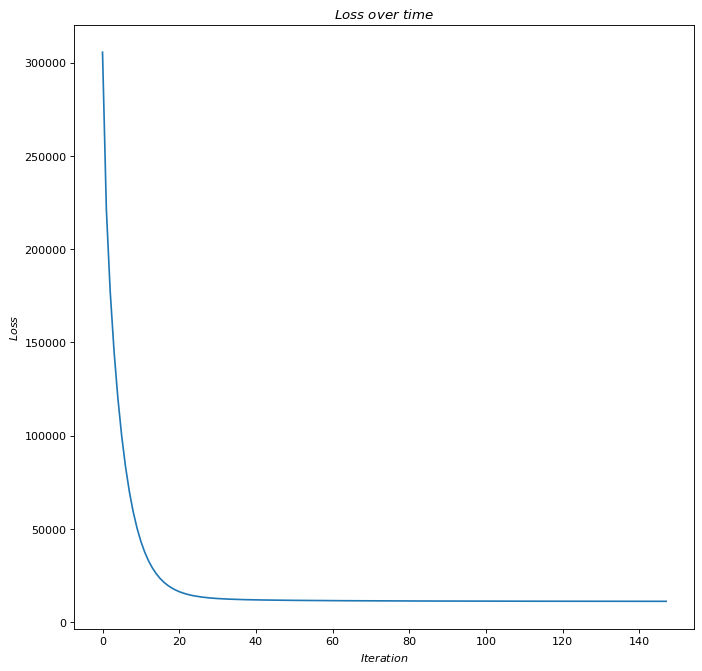

In [16]:
plt.figure(figsize=(10, 10), dpi=80)
plt.title('$Loss\ over\ time$')
plt.xlabel('$Iteration$')
plt.ylabel('$Loss$')
plt.plot(np.arange(len(model2.loss_track)),model2.loss_track) 

*  The learning rate decides what is the steps size during the gradient descent. Bigger rate means bigger step which in theory result in less iteration and faster convergance, but there is a risk for "jumping" over minima points. A smaller rate means that we will reach local minima but in a very slow pace. 

* We can decide about an automatic number of iteration by calculating the initial loss and then deviding it by the learning rate.

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



1. Starting with:


$$L(y,w)={(y-Xw)^2} + \lambda \left\Vert w \right\Vert_2^2 = {(y-Xw)^T\cdot(y-Xw)} + \lambda w^{T}w = y^{T}y - 2w^{T}X^{T}y
+ w^{T}(X^{T}X +\lambda I)w$$

Taking the dirivative:

$$\frac{\partial{L_{ridge}}}{\partial{w}} = -2X^{T}y +2(X^{T}X+\lambda I)w$$

Dividing by 2 and equating to 0 we get:

$$\frac{\partial{L_{Ridge}}}{\partial{w}}=X^T(Xw-y) + \lambda w=0$$

$$X^TXw-X^Ty + \lambda w=0$$

$$(X^TX + \lambda I)w - X^Ty=0$$

$$(X^TX + \lambda I)w=X^Ty$$

$$w_{Ridge}=(X^TX + \lambda I)^{-1}X^Ty$$

We showed the required analytical solution.

In [17]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    #Closed form of ridge regression
    self.X = self.pad(X)
    self.Y = Y
    self.w = np.linalg.inv((self.X.T@self.X + self.ridge_lambda*np.identity(self.X.shape[1])))@self.X.T@self.Y
    

    
class RidgelsGd(OlsGd):
  
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgelsGd, self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
      
  def _step(self, X, Y):
    # use w update for gradient descent
    self.w = self.w - self.learning_rate/len(X)*(X.T@(X@self.w - Y) + self.ridge_lambda*self.w)
  
  def _loss(self, X, y):
   return 0.5*(X@self.w - y).T@(X@self.w-y) + self.ridge_lambda*(self.w.T@self.w)



In [18]:
model_3 = RidgeLs(0.3)
model_3._fit(X,y)
model_4 = RidgelsGd(ridge_lambda = 0.3)
model_4._fit(X,y)
model_3.score(X,y),model_4.score(X,y)


(22.097691867180334, 22.12941284896924)

### Use scikitlearn implementation for OLS, Ridge and Lasso

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

clf_lr = LinearRegression()
clf_lr.fit(X, y)
lr_preds = clf_lr.predict(X)

clf_ridge = Ridge(alpha=1.)
clf_ridge.fit(X, y)
ridge_preds = clf_ridge.predict(X)

clf_lasso = Lasso(alpha=0.2)
clf_lasso.fit(X, y)
lasso_preds = clf_lasso.predict(X)

print(f"Linear Regression MSE - {mean_squared_error(lr_preds, y)}")
print(f"Ridge MSE - {mean_squared_error(ridge_preds, y)}")
print(f"Lasso MSE - {mean_squared_error(lasso_preds, y)}")

Linear Regression MSE - 21.894831181729202
Ridge MSE - 22.044452243088195
Lasso MSE - 23.397582545298388


As can be seen the $OLS$ got the optimal solution while the Ridge got the second lowest $MSE$ due to the normalization of the weights. The Lasso got last becuase it tends to sparse the weights (not a convexed plain as we saw in the class).